# Estandarizar datos

##### Función para estandarizar los datos de la clase Datos. Si el atributo es __nominal__, lo estanariza con la formula: `z = (x - u) / s`. El nuevo valor de ese dato es `z`, `x` es el valor del dato, `u` la media de ese atributo y `s` la varianza de ese atributo.

In [76]:
%load_ext autoreload
%autoreload 2

# Codigo anteior para auto recargar el notebook si se modifican los ficheros 
# que se usan y no tener que abrir y cerrar vscode

from Datos import Datos
from EstrategiaParticionado import ValidacionSimple, ValidacionCruzada

# carga de datos del fichero
datos = Datos(nombreFichero='ConjuntosDatosP1/heart.csv')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Diccionarios:
 {'Age': {}, 'Sex': {'F': 0, 'M': 1}, 'ChestPainType': {'ASY': 0, 'ATA': 1, 'NAP': 2, 'TA': 3}, 'RestingBP': {}, 'Cholesterol': {}, 'FastingBS': {}, 'RestingECG': {'LVH': 0, 'Normal': 1, 'ST': 2}, 'MaxHR': {}, 'ExerciseAngina': {'N': 0, 'Y': 1}, 'Oldpeak': {}, 'ST_Slope': {'Down': 0, 'Flat': 1, 'Up': 2}, 'Class': {0.0: 0, 1.0: 1}}
Datos transformados:
 [[40.   1.   1.  ...  0.   2.   0. ]
 [49.   0.   2.  ...  1.   1.   1. ]
 [37.   1.   1.  ...  0.   2.   0. ]
 ...
 [57.   1.   0.  ...  1.2  1.   1. ]
 [57.   0.   1.  ...  0.   1.   1. ]
 [38.   1.   2.  ...  0.   2.   0. ]]
NominalAtributos:
 [False, True, True, False, False, False, True, False, True, False, True, True]
shape:  918


##### El siguiente resultado es con el que se comparará la funcion asumiento que la función de sklearn es la correcta

In [77]:
from sklearn.preprocessing import StandardScaler

# resultado de estandarización con sklearn
scaler = StandardScaler()
print(scaler.fit_transform(datos.datos))

[[-1.4331398   0.51595242  0.22903206 ... -0.83243239  1.05211381
  -1.11311472]
 [-0.47848359 -1.93816322  1.27505906 ...  0.10566353 -0.59607813
   0.89837999]
 [-1.75135854  0.51595242  0.22903206 ... -0.83243239  1.05211381
  -1.11311472]
 ...
 [ 0.37009972  0.51595242 -0.81699495 ...  0.29328271 -0.59607813
   0.89837999]
 [ 0.37009972 -1.93816322  0.22903206 ... -0.83243239 -0.59607813
   0.89837999]
 [-1.64528563  0.51595242  1.27505906 ... -0.83243239  1.05211381
  -1.11311472]]


In [78]:
print(datos.estandarizarDatos())

[[-1.4331398   1.          1.         ... -0.83243239  2.
   0.        ]
 [-0.47848359  0.          2.         ...  0.10566353  1.
   1.        ]
 [-1.75135854  1.          1.         ... -0.83243239  2.
   0.        ]
 ...
 [ 0.37009972  1.          0.         ...  0.29328271  1.
   1.        ]
 [ 0.37009972  0.          1.         ... -0.83243239  1.
   1.        ]
 [-1.64528563  1.          2.         ... -0.83243239  2.
   0.        ]]


##### Se observa que el resultado es correcto solo para las filas que tienen atributos continuos. Habría que decir a la función de sklearn cuales son atributos nominales y cuales no, pero cambia dependiendo del dataset. La precision es extremadamente alta en todos los decimales, por lo que se puede concluir que nuestra implementación es correcta.

# Naive Bayes

### Naive Bayes *propio*

##### Obtiene resultados de aproximadamente 83-85 % de precisión en las predicciones con validacion simple y 89-92 % con validacion cruzada. Teniendo en cuenta que los dataset tampoco son muy grandes (de hecho se podrían considerar pequeños) la precisión obtenida es buena.

In [79]:
from ClasificadorNB import ClaificadorNaiveBayes

# validacion simple
datos = Datos(nombreFichero='ConjuntosDatosP1/heart.csv', print_val=False)

estrategiaVS = ValidacionSimple(proporcionTrain=0.75, numeroEjecuciones=5)

clasificador = ClaificadorNaiveBayes()
acierto = clasificador.validacion(estrategiaVS, datos, clasificador, laplace=False)

print('Validación simple\nAcierto: ', acierto[0])

# validacion cruzada
datos = Datos(nombreFichero='ConjuntosDatosP1/heart.csv', print_val=False)

estrategiaVC = ValidacionCruzada(k=5)

clasificador = ClaificadorNaiveBayes()
aciertos = clasificador.validacion(estrategiaVC, datos, clasificador, laplace=False)

print('\nValidación cruzada\nAciertos por partición: ', aciertos)

Validación simple
Acierto:  0.8521739130434782

Validación cruzada
Aciertos por partición:  [0.9021739130434783, 0.8633879781420765, 0.8961748633879781, 0.8961748633879781, 0.9135135135135135]


Observación: Para el dataset wdbc.csv se obtienen resultados muy pobres. Para cada partición detecta siempre la misma clase, aunque indagando, nos fijamos que por alguna razón si que está escogiendo bien, pues la probabilidad mayor es la de la clase que finalmente escoge. Hemos probado a hacer las particiones con nuestro metodo y el entrenamiento y predicción con sklearn y obtiene buenos resultados. Esto indica que el problema debe radicar en las funciones de `entrenamiento` o `clasifica` de ClasificadorNB. Sin embargo, no hemos logrado localizar ningún error, menos sabiendo que funciona correctamente (o por lo menos con buenos resultados) para el otro dataset. Se deja esa prueba al final del documento como "Anexo 1".

### Naive Bayes de *SKLearn*

##### Salen precisiones aceptables, auque para que salieran mejores habría que hacer cada atributo con su forma correspondiente como se hace en nuestra implementación. Para los atributos numéricos, Gaussian estaría bien mientras que para los nominales habría que usar el Categorical por ejemplo. Esta forma está aplicando a todos el mismo (Gaussian, multinomial o Categorical). Es por esto que nuestros resultados son un poco mejores. 

##### Respecto a los atributos fit_prior y alpha y la estrategia de particionado, el cambio es poco sin embargo, en el absoluto si que hay un cambio. Por ejemplo, la configuración de estos elemenos mínima para categorical es 84,7 % mientras la máxima es 85,5 % y lo mismo para  Multinomial, que aumenta casi 2 puntos también. Es una forma de mejorar un poco el resultado, a pesar de que no sea significativo.

In [ ]:
import warnings
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Suprimir advertencias de runtime
warnings.filterwarnings("ignore", category=RuntimeWarning)

datos = Datos(nombreFichero='ConjuntosDatosP1/heart.csv', print_val=False)
X = datos.datos[:, :-1]
y = datos.datos[:, -1]

# Escalar los datos para MultinomialNB
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


discretizer = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
X_discretized = discretizer.fit_transform(X)  # Ajustar en X completo

# Dividir los datos para validación simple
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train_discretized, X_test_discretized = train_test_split(X_discretized, test_size=0.3, random_state=42)

# Dividir los datos discretizados
X_train_discretized, X_test_discretized, y_train, y_test = train_test_split(X_discretized, y, test_size=0.3, random_state=42)

# Parámetros para iterar sobre fit_prior y alpha
fit_prior_values = [True, False]
alpha_values = [0.0, 1.0]

# Resultados de validación
results = []

# Función para probar un modelo con los parámetros dados y calcular sus precisiones
def evaluate_model(model, model_name, X_train, X_test, X_full):
    # Validación simple
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    simple_accuracy = accuracy_score(y_test, y_pred)
    
    # Validación cruzada usando StratifiedKFold para mantener la proporción de clases
    cv_accuracy = cross_val_score(model, X_full, y, cv=5, scoring='accuracy').mean()
    
    results.append({
        'model': model_name,
        'fit_prior': getattr(model, 'fit_prior', 'N/A'),
        'alpha': getattr(model, 'alpha', 'N/A'),
        'simple_accuracy': simple_accuracy,
        'cv_accuracy': cv_accuracy
    })

# Evaluar GaussianNB
evaluate_model(GaussianNB(), 'GaussianNB', X_train, X_test, X_scaled)

# Evaluar MultinomialNB
for fit_prior in fit_prior_values:
    for alpha in alpha_values:
        model = MultinomialNB(alpha=alpha, fit_prior=fit_prior)
        evaluate_model(model, 'MultinomialNB', X_train, X_test, X_scaled)

# Evaluar CategoricalNB
if np.count_nonzero(datos.nominalAtributos) > 1:
    for fit_prior in fit_prior_values:
        for alpha in alpha_values:
            model = CategoricalNB(fit_prior=fit_prior, alpha=alpha)
            evaluate_model(model, 'CategoricalNB', X_train_discretized, X_test_discretized, X_discretized)

# Mostrar los resultados
results_df = pd.DataFrame(results)
print(results_df)

#%pip install matplotlib

import matplotlib.pyplot as plt

# Crear un DataFrame a partir de los resultados
results_df = pd.DataFrame(results)

# Configuración para el gráfico
plt.figure(figsize=(12, 6))

# Gráfico de barras para la precisión simple
plt.subplot(1, 2, 1)
plt.bar(results_df['model'], results_df['simple_accuracy'], color='blue')
plt.title('Precisión Simple por Modelo')
plt.ylabel('Precisión')
plt.xticks(rotation=45)

# Gráfico de barras para la precisión de validación cruzada
plt.subplot(1, 2, 2)
plt.bar(results_df['model'], results_df['cv_accuracy'], color='orange')
plt.title('Precisión de Validación Cruzada por Modelo')
plt.ylabel('Precisión')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

NameError: name 'X_discretized' is not defined

# KNN

### KNN *propio*
A continuación, realizaremos la clasificación mediante K-NN propio para diferentes valores de K (`K=1`, `K=5`, `K=11`, y `K=21`). 
Se ejecutará tanto con datos estandarizados como sin estandarizar, para dos tipos de validación (simple y cruzada).

In [ ]:
import warnings
import numpy as np
import pandas as pd
from ClasificadorKNN import ClasificadorKNN
from EstrategiaParticionado import ValidacionSimple, ValidacionCruzada
import matplotlib.pyplot as plt
from Datos import Datos

# Suprimir advertencias de runtime
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Cargar el conjunto de datos 'heart.csv' usando la clase Datos
datos = Datos(nombreFichero='ConjuntosDatosP1/heart.csv', print_val=False)

# Valores de K y configuración de normalización para el clasificador KNN
valores_k = [1, 5, 11, 21]
normalizaciones = [True, False]
resultados_knn_propio = []

# Configuración de validaciones
estrategiaVS = ValidacionSimple(proporcionTrain=0.75, numeroEjecuciones=5)
estrategiaVC = ValidacionCruzada(k=5)

# Función para realizar entrenamiento y evaluación
def evaluar_knn(clasificador, datos_train, datos_test):
    clasificador.entrenamiento(datos_train, datos.nominalAtributos, datos.diccionarios)
    predicciones = clasificador.clasifica(datos_test, datos.nominalAtributos, datos.diccionarios)
    return sum(predicciones == datos_test[:, -1]) / len(predicciones)

for normalizar in normalizaciones:
    for k in valores_k:
        # Instancia del clasificador KNN con configuración actual
        clasificador = ClasificadorKNN(k=k, normalizar=normalizar)
        
        # Validación Simple
        precisiones_simple = []
        particiones_simple = estrategiaVS.creaParticiones(datos)
        for particion in particiones_simple:
            datos_train = datos.extraeDatos(particion.indicesTrain)
            datos_test = datos.extraeDatos(particion.indicesTest)
            precision = evaluar_knn(clasificador, datos_train, datos_test)
            precisiones_simple.append(precision)
        promedio_vs = np.mean(precisiones_simple)
        resultados_knn_propio.append(['Simple', k, normalizar, promedio_vs])

        # Validación Cruzada
        precisiones_cruzada = []
        particiones_cruzada = estrategiaVC.creaParticiones(datos)
        for particion in particiones_cruzada:
            datos_train = datos.extraeDatos(particion.indicesTrain)
            datos_test = datos.extraeDatos(particion.indicesTest)
            precision = evaluar_knn(clasificador, datos_train, datos_test)
            precisiones_cruzada.append(precision)
        promedio_vc = np.mean(precisiones_cruzada)
        resultados_knn_propio.append(['Cruzada', k, normalizar, promedio_vc])

# Crear un DataFrame a partir de los resultados
resultados_df = pd.DataFrame(resultados_knn_propio, columns=['Validación', 'K', 'Normalización', 'Precisión'])

# Gráfico de los resultados
plt.figure(figsize=(12, 6))

# Gráfico de barras para la precisión simple
plt.subplot(1, 2, 1)
simple_results = resultados_df[resultados_df['Validación'] == 'Simple']
plt.bar([f"K={k} - {'Norm' if n else 'No Norm'}" for k, n in zip(simple_results['K'], simple_results['Normalización'])],
        simple_results['Precisión'], color='blue')
plt.title('Precisión Simple por Configuración de K y Normalización')
plt.ylabel('Precisión')
plt.xticks(rotation=45)

# Gráfico de barras para la precisión de validación cruzada
plt.subplot(1, 2, 2)
cross_val_results = resultados_df[resultados_df['Validación'] == 'Cruzada']
plt.bar([f"K={k} - {'Norm' if n else 'No Norm'}" for k, n in zip(cross_val_results['K'], cross_val_results['Normalización'])],
        cross_val_results['Precisión'], color='orange')
plt.title('Precisión de Validación Cruzada por Configuración de K y Normalización')
plt.ylabel('Precisión')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Mostrar la tabla de resultados
print(resultados_df)


##### ...

### KNN de *SKLearn*
Ahora, realizaremos la clasificación mediante `KNeighborsClassifier` de Scikit-Learn para los mismos valores de `K`, 
con datos estandarizados y no estandarizados, y aplicando las mismas configuraciones de validación.

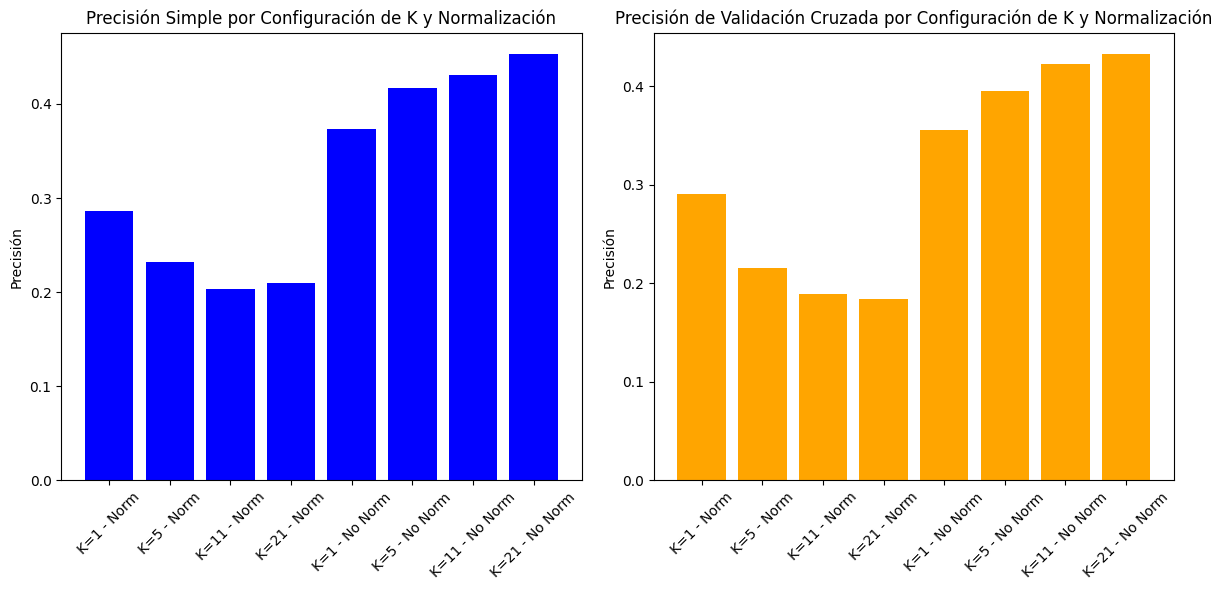

   Validación   K  Normalización  Precisión
0      Simple   1           True   0.286232
1     Cruzada   1           True   0.290883
2      Simple   5           True   0.231884
3     Cruzada   5           True   0.215704
4      Simple  11           True   0.202899
5     Cruzada  11           True   0.189552
6      Simple  21           True   0.210145
7     Cruzada  21           True   0.184117
8      Simple   1          False   0.373188
9     Cruzada   1          False   0.355150
10     Simple   5          False   0.416667
11    Cruzada   5          False   0.395426
12     Simple  11          False   0.431159
13    Cruzada  11          False   0.422701
14     Simple  21          False   0.452899
15    Cruzada  21          False   0.432520


In [91]:
import warnings
import numpy as np
import pandas as pd
from ClasificadorKNNSK import ClasificadorKNNSK
from sklearn.metrics import accuracy_score
from EstrategiaParticionado import ValidacionSimple, ValidacionCruzada
import matplotlib.pyplot as plt
from Datos import Datos
from sklearn.preprocessing import MinMaxScaler

# Suprimir advertencias de runtime
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Cargar el conjunto de datos 'heart.csv' usando la clase Datos
datos = Datos(nombreFichero='ConjuntosDatosP1/heart.csv', print_val=False)
X = datos.datos[:, :-1]  # Características
y = datos.datos[:, -1]   # Etiquetas

# Normalización para usar con KNN de Scikit-Learn
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Valores de K y configuración de normalización para el clasificador KNN
valores_k = [1, 5, 11, 21]
normalizaciones = [True, False]
resultados_knn_sklearn = []

# Configuración de validaciones
estrategiaVS = ValidacionSimple(proporcionTrain=0.75, numeroEjecuciones=5)
estrategiaVC = ValidacionCruzada(k=5)

# Función para evaluar el modelo y almacenar los resultados
def evaluar_knn_sklearn(clasificador, datos_train, datos_test, y_train, y_test, k, normalizar, validacion):
    clasificador.entrenamiento(datos_train, datos.nominalAtributos, datos.diccionarios)
    predicciones = clasificador.clasifica(datos_test, datos.nominalAtributos, datos.diccionarios)
    precision = accuracy_score(y_test, predicciones)
    resultados_knn_sklearn.append([validacion, k, normalizar, precision])

for normalizar in normalizaciones:
    for k in valores_k:
        # Instancia del clasificador KNN de Scikit-Learn
        clasificador = ClasificadorKNNSK(k=k, normalizar=normalizar)
        
        # Validación Simple
        precisiones_simple = []
        particiones_simple = estrategiaVS.creaParticiones(datos)
        for particion in particiones_simple:
            datos_train = datos.extraeDatos(particion.indicesTrain)
            datos_test = datos.extraeDatos(particion.indicesTest)
            y_train = datos_train[:, -1]
            y_test = datos_test[:, -1]
            evaluar_knn_sklearn(clasificador, datos_train, datos_test, y_train, y_test, k, normalizar, 'Simple')
            precisiones_simple.append(accuracy_score(y_test, clasificador.clasifica(datos_test, datos.nominalAtributos, datos.diccionarios)))
        promedio_vs = np.mean(precisiones_simple)
        resultados_knn_sklearn.append(['Simple', k, normalizar, promedio_vs])

        # Validación Cruzada
        precisiones_cruzada = []
        particiones_cruzada = estrategiaVC.creaParticiones(datos)
        for particion in particiones_cruzada:
            datos_train = datos.extraeDatos(particion.indicesTrain)
            datos_test = datos.extraeDatos(particion.indicesTest)
            y_train = datos_train[:, -1]
            y_test = datos_test[:, -1]
            evaluar_knn_sklearn(clasificador, datos_train, datos_test, y_train, y_test, k, normalizar, 'Cruzada')
            precisiones_cruzada.append(accuracy_score(y_test, clasificador.clasifica(datos_test, datos.nominalAtributos, datos.diccionarios)))
        promedio_vc = np.mean(precisiones_cruzada)
        resultados_knn_sklearn.append(['Cruzada', k, normalizar, promedio_vc])

# Crear un DataFrame a partir de los resultados
resultados_df = pd.DataFrame(resultados_knn_sklearn, columns=['Validación', 'K', 'Normalización', 'Precisión'])

# Gráfico de los resultados
plt.figure(figsize=(12, 6))

# Gráfico de barras para la precisión simple
plt.subplot(1, 2, 1)
simple_results = resultados_df[resultados_df['Validación'] == 'Simple']
plt.bar([f"K={k} - {'Norm' if n else 'No Norm'}" for k, n in zip(simple_results['K'], simple_results['Normalización'])],
        simple_results['Precisión'], color='blue')
plt.title('Precisión Simple por Configuración de K y Normalización')
plt.ylabel('Precisión')
plt.xticks(rotation=45)

# Gráfico de barras para la precisión de validación cruzada
plt.subplot(1, 2, 2)
cross_val_results = resultados_df[resultados_df['Validación'] == 'Cruzada']
plt.bar([f"K={k} - {'Norm' if n else 'No Norm'}" for k, n in zip(cross_val_results['K'], cross_val_results['Normalización'])],
        cross_val_results['Precisión'], color='orange')
plt.title('Precisión de Validación Cruzada por Configuración de K y Normalización')
plt.ylabel('Precisión')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Mostrar la tabla de resultados
print(resultados_df)


##### ...

## Anexo 1

In [223]:
# PRUEBA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# dataset wdbc
datos = Datos(nombreFichero='ConjuntosDatosP1/wdbc.csv', print_val=False)
datos.estandarizarDatos()

# particion con nuestros metodos
estrategiaVS = ValidacionSimple(proporcionTrain=0.75, numeroEjecuciones=5)
estrategiaVC = ValidacionCruzada(k=7)

particiones = estrategiaVC.creaParticiones(datos)

list_errores = []

len_particiones = len(particiones)

nb_model = GaussianNB()

for num_particion in range(len_particiones):
    datos_train = datos.extraeDatos(particiones[num_particion].indicesTrain)
    datos_test = datos.extraeDatos(particiones[num_particion].indicesTest)

    x_train = datos_train[:, :-1]
    y_train = datos_train[:, -1]

    x_test = datos_test[:, :-1]
    y_test = datos_test[:, -1]

    # Entrenamos el modelo con SKLearn
    nb_model.fit(x_train, y_train)

    # Realizamos predicciones con SKLearn
    y_pred = nb_model.predict(x_test)

    # Evaluamos la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    list_errores.append(accuracy)
print(f"Precisión: {list_errores}")



Precisión: [1.0, 0.8888888888888888, 0.8888888888888888, 0.9382716049382716, 0.9382716049382716, 0.9629629629629629, 0.9390243902439024]
